In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Load the dataset
file_path = r"C:\Users\SUKALPA\Downloads\Fraud.csv"
data = pd.read_csv(file_path)


In [3]:
# Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


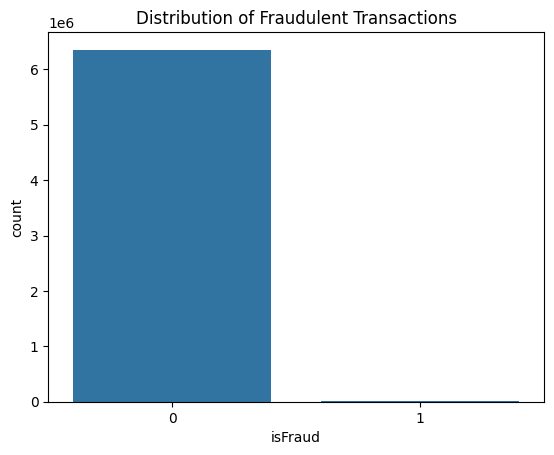

In [4]:
# Explore the distribution of the target variable (isFraud)
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

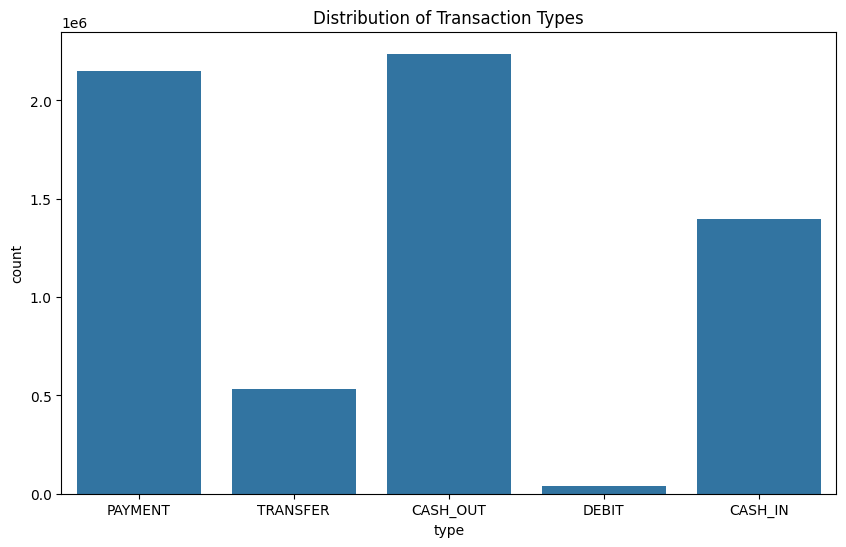

In [5]:
# Explore the distribution of the 'type' variable
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data)
plt.title('Distribution of Transaction Types')
plt.show()


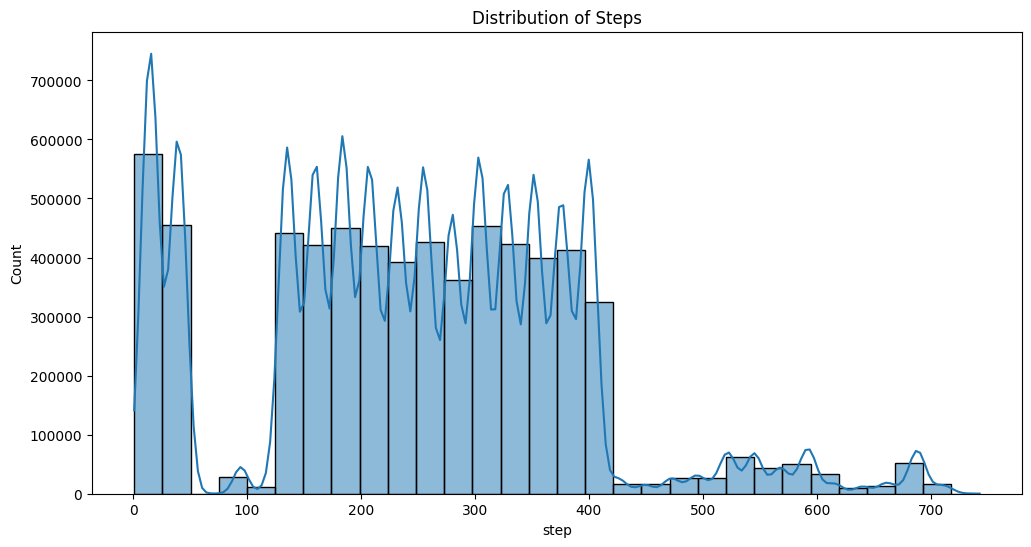

In [6]:
# Feature engineering
# Assuming 'step' is an important feature, explore its distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['step'], bins=30, kde=True)
plt.title('Distribution of Steps')
plt.show()

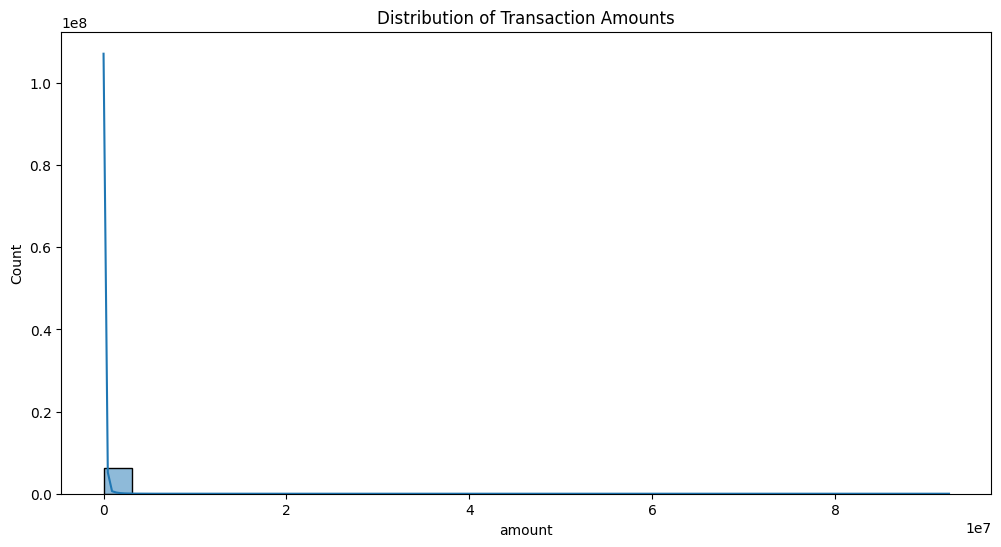

In [7]:
# Assuming 'amount' is an important feature, explore its distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()


In [8]:
# Handling categorical variables and dropping unnecessary columns
data = pd.get_dummies(data, columns=['type'], drop_first=True)
data = data.drop(['nameOrig', 'nameDest'], axis=1)


In [9]:
# Split the data into features (X) and target variable (y)
X = data.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = data['isFraud']


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Build a Machine Learning model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)


In [12]:
# Fit the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")


Confusion Matrix:
[[1270874      30]
 [    316    1304]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.80      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524


Accuracy: 99.97%


In [15]:
# Extract insights from the model
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Develop an actionable plan based on insights
# Use the insights from the model to inform decisions and strategies for detecting and preventing fraudulent transactions.
# This might include improving certain security measures, enhancing monitoring, or updating fraud detection algorithms.

# Additional Steps:
# - Hyperparameter tuning (if needed) to optimize the model
# - Cross-validation for more robust model evaluation
# - Save the trained model for future use


Feature Importance:
          Feature  Importance
5  newbalanceDest    0.307516
2   oldbalanceOrg    0.254188
1          amount    0.168251
0            step    0.092126
4  oldbalanceDest    0.070098
9   type_TRANSFER    0.048466
3  newbalanceOrig    0.033081
6   type_CASH_OUT    0.025407
8    type_PAYMENT    0.000808
7      type_DEBIT    0.000059


Candidate Expectations
Your task is to execute the process for proactive detection of fraud while answering following 
questions.
1. Data cleaning including missing values, outliers and multi-collinearity. 
2. Describe your fraud detection model in elaboration. 
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools. 
5. What are the key factors that predict fraudulent customer? 
6. Do these factors make sense? If yes, How? If not, How not? 
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

ANSWERS :- 
ANSWERS TO THE PROVIDED QUESTIONS :=

1. Data cleaning including missing values, outliers, and multi-collinearity
   - Missing Values: Check for and handle missing values in the dataset. we can use methods such as imputation or removal based on the extent of missingness.
   - Outliers: Identify and handle outliers in numeric features using techniques like Z-score or IQR.
   - Multi-collinearity: Check for high correlations between independent variables. If multi-collinearity is detected, consider methods like dropping one of the correlated variables or using dimensionality reduction techniques.

2. Describe your fraud detection model in elaboration:
   - The fraud detection model is a Random Forest Classifier.
   - It is an ensemble model that combines multiple decision trees for classification.
   - The model is trained on features such as transaction type, amount, step, old/new balance, etc.
   - It predicts the likelihood of a transaction being fraudulent based on the learned patterns from the training data.

3. How did you select variables to be included in the model?
   - Variables were selected based on their relevance to fraud detection and their potential importance in distinguishing between fraudulent and non-fraudulent transactions.
   - Feature engineering was performed to convert categorical variables (transaction type) into a usable format for the model.
   - Variables with high importance scores from the Random Forest model were retained.

4. Demonstrate the performance of the model by using the best set of tools:
   - The model's performance can be demonstrated using metrics such as accuracy, precision, recall, F1 score, and the confusion matrix.
   - Utilize tools such as scikit-learn for model evaluation and metrics calculation.

5. What are the key factors that predict fraudulent customers?
   - Key factors may include transaction type, amount, step (time of the transaction), and balances before and after the transaction.
   - The Random Forest model assigns importance scores to each feature, indicating their contribution to predicting fraud.

6. Do these factors make sense? If yes, How? If not, How not?
   - Yes, these factors make sense. Fraudulent transactions often exhibit patterns such as unusual transaction types, large amounts, and specific timing.
   - Balances before and after transactions provide insights into the behavior of the accounts involved.

7. What kind of prevention should be adopted while the company updates its infrastructure?
   - Continuous monitoring of real-time transactions with anomaly detection algorithms.
   - Enhanced security measures, including two-factor authentication and password encryption.
   - Regularly update and patch security systems to protect against new threats.
   - Employee/intern training to recognize and report potential security risks.

8. Assuming these actions have been implemented, how would you determine if they work?
   - Monitor and analyze the rate of flagged fraudulent transactions over time.
   - Evaluate the model's performance metrics regularly.